# Initial Data Analysis

In [37]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Define the goal of your analysis

- How can you define your goal as a question that you can answer with data analysis?
    - Which sub questions do you need to answer this question?

Analyze the stock market trend over time.
 - Find interesting dates,weeks,month with the biggest moves. To further investigate the reasons for them.


## Data Handling

- Reflect on your data set.
    - How was it collected? Where does it come from? What implications does that have for answering your question?
- Load your data and observe what state your data is in.
- Identify things that need to be cleaned and preprocessed and make a plan for which processing steps you need.
    - E.g., correcting data types, filling in missing values, removing unneeded columns,...
- Execute that plan and document the resulting data set.

---

- Data taken from Market Watch https://www.marketwatch.com/investing/index/spx/download-data . 

- One year per download, so had to combine them into a single dataframe. Every market day from 09/15/2005 to 10/08/2021. * (In the python file) * 
- Everything is an object
- Need to typecast everthing
- Its only S&P so, its not the whole market but pretty much. Data would be only useful for the the major companies.


In [38]:
df = pd.read_csv('data/5to21.csv')
print(df.head())
print(df.tail())
print(df.dtypes)


         Date      Open      High       Low     Close
0  10/08/2021  4,406.51  4,412.02  4,386.22  4,391.34
1  10/07/2021  4,383.73  4,429.97  4,383.73  4,399.76
2  10/06/2021  4,319.57  4,365.57  4,290.49  4,363.55
3  10/05/2021  4,309.87  4,369.23  4,309.87  4,345.72
4  10/04/2021  4,348.84  4,355.51  4,278.94  4,300.46
            Date      Open      High       Low     Close
4040  09/21/2005  1,210.20  1,221.52  1,209.89  1,210.20
4041  09/20/2005  1,221.34  1,236.49  1,220.07  1,221.34
4042  09/19/2005  1,231.02  1,237.91  1,227.65  1,231.02
4043  09/16/2005  1,237.91  1,237.95  1,228.42  1,237.91
4044  09/15/2005  1,227.73  1,231.88  1,224.85  1,227.73
Date     object
Open     object
High     object
Low      object
Close    object
dtype: object


In [39]:
df['Date']= pd.to_datetime(df['Date'], infer_datetime_format=True)
df = df.replace(',','', regex=True)
df['Open']= df['Open'].astype(float)
df['High']= df['High'].astype(float)
df['Low']= df['Low'].astype(float)
df['Close']= df['Close'].astype(float)
df.head()

,Date,Open,High,Low,Close
0,2021-10-08,4406.51,4412.02,4386.22,4391.34
1,2021-10-07,4383.73,4429.97,4383.73,4399.76
2,2021-10-06,4319.57,4365.57,4290.49,4363.55
3,2021-10-05,4309.87,4369.23,4309.87,4345.72
4,2021-10-04,4348.84,4355.51,4278.94,4300.46


## Methods

- Identify which parts of the dataset are most relevant to answering your questions
    - Which features are most relevant?
    - What can you say about the quality of these features? How will it influence your analysis?

I want to primarily focus on the Close column but other ones are able to provide more information.  
It should be very accurate as it was taken from a reputable source.  

- Select which methods you want to use to answer your questions.
    - Which results will you generate?

I plan to look at the differences between the days and weeks, to identify when the most change took place.
Using .diff between the closes of each day and each week. And graphing bar charts to visually sea the difference.

---

1. Results and Discussion
- Generate results with the methods defined above.
- Interpret individual results
    - What does the result mean?
    - Does it answer your question?
    - Is it robust?

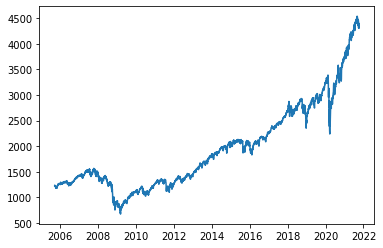

In [40]:
#All the data
plt.plot( 'Date', 'Close', data=df)
plt.show()



## The well known chart, that you can get by googling S&P 500 

In [41]:
closeDif= pd.DataFrame(df).copy() # Deep Copy
closeDif['Close_dif'] = df['Close'].diff()
closeDif=closeDif.sort_values(by='Close_dif')
print(closeDif.head())
closeDif=closeDif.sort_values(by='Close_dif', ascending=False)
print(closeDif.head())

          Date     Open     High      Low    Close  Close_dif
398 2020-03-12  2630.86  2660.95  2478.86  2480.64    -230.38
391 2020-03-23  2290.71  2300.73  2191.86  2237.40    -209.93
382 2020-04-03  2514.92  2538.18  2459.96  2488.65    -175.03
389 2020-03-25  2457.77  2571.42  2407.53  2475.56    -154.51
396 2020-03-16  2508.59  2562.98  2380.94  2386.13    -143.06
          Date     Open     High      Low    Close  Close_dif
397 2020-03-13  2569.99  2711.33  2492.37  2711.02     324.89
399 2020-03-11  2825.60  2825.60  2707.22  2741.38     260.74
402 2020-03-06  2954.20  2985.93  2901.54  2972.37     225.81
336 2020-06-10  3213.42  3223.27  3181.49  3190.14     188.04
400 2020-03-10  2813.48  2882.59  2734.00  2882.23     140.85


### Biggest Single day drop and increase in S&P happened in March 2020 due to Covid.

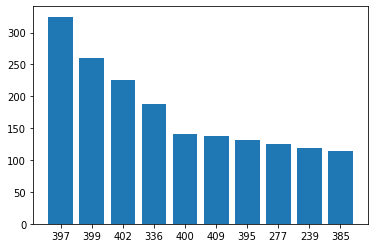

In [42]:
y_pos = np.arange(10)

plt.bar(y_pos, closeDif['Close_dif'].head(10))
plt.xticks(y_pos, closeDif.head(10).index)
plt.show()

### Now I want to identify biggest Friday to Friday changes.

In [43]:
#friday is 4
onlyFridays= pd.DataFrame(df).copy() # Deep Copy
onlyFridays = onlyFridays[onlyFridays['Date'].dt.dayofweek == 4]
onlyFridays['Close_dif'] = onlyFridays['Close'].diff()
onlyFridays=onlyFridays.sort_values(by='Close_dif')
print(onlyFridays.head())
onlyFridays=onlyFridays.sort_values(by='Close_dif', ascending=False)
print(onlyFridays.head())


          Date     Open     High      Low    Close  Close_dif
382 2020-04-03  2514.92  2538.18  2459.96  2488.65    -385.91
236 2020-10-30  3293.59  3304.93  3233.94  3269.96    -239.48
392 2020-03-20  2431.94  2453.01  2295.56  2304.92    -236.55
324 2020-06-26  3073.20  3073.73  3004.63  3009.05    -175.99
175 2021-01-29  3778.05  3778.05  3694.12  3714.24    -172.59
           Date     Open     High      Low    Close  Close_dif
397  2020-03-13  2569.99  2711.33  2492.37  2711.02     406.10
412  2020-02-21  3360.50  3360.76  3328.45  3337.75     383.53
402  2020-03-06  2954.20  2985.93  2901.54  2972.37     261.35
3276 2008-10-03  1128.35  1153.82  1098.14  1099.23     200.01
241  2020-10-23  3464.90  3466.46  3440.45  3465.39     195.43


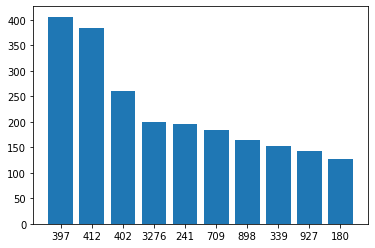

In [44]:
y_pos = np.arange(10)

plt.bar(y_pos, onlyFridays['Close_dif'].head(10))
plt.xticks(y_pos, onlyFridays.head(10).index)
plt.show()

### During march of 2020 a lot of records where broken, so I want to look before 2020.

In [45]:
before2020= pd.DataFrame(df).copy() # Deep Copy
before2020= before2020[~(before2020['Date'] > '2020-01-01')]
before2020['Close_dif'] = before2020['Close'].diff()
before2020=before2020.sort_values(by='Close_dif')
print(before2020.head())
before2020=before2020.sort_values(by='Close_dif', ascending=False)
print(before2020.head())

           Date     Open     High      Low    Close  Close_dif
703  2018-12-24  2400.56  2410.34  2351.10  2351.10    -116.60
3271 2008-10-10   866.33   936.36   839.80   899.22    -104.13
3260 2008-10-27   860.23   893.78   846.75   848.92     -91.59
697  2019-01-03  2491.92  2493.14  2443.96  2447.89     -84.05
1542 2015-08-25  1898.08  1948.04  1867.08  1867.61     -72.90
           Date     Open     High      Low    Close  Close_dif
927  2018-02-02  2808.92  2808.92  2759.97  2762.13     113.19
3281 2008-09-26  1187.54  1215.77  1187.54  1213.01     106.62
924  2018-02-07  2690.95  2727.67  2681.33  2681.66     100.66
755  2018-10-09  2882.51  2894.83  2874.27  2880.34      94.66
717  2018-12-03  2790.50  2800.18  2773.38  2790.37      90.31


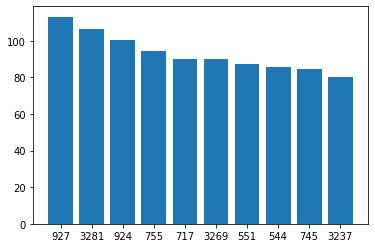

In [46]:
y_pos = np.arange(10)

plt.bar(y_pos, before2020['Close_dif'].head(10))
plt.xticks(y_pos, before2020.head(10).index)
plt.show()

In [47]:
onlyFridaysB2020= pd.DataFrame(df).copy() # Deep Copy
onlyFridaysB2020= onlyFridaysB2020[~(onlyFridaysB2020['Date'] > '2020-01-01')]

onlyFridaysB2020= onlyFridaysB2020[onlyFridaysB2020['Date'].dt.dayofweek == 4]
onlyFridaysB2020['Close_dif'] = onlyFridaysB2020['Close'].diff()
onlyFridaysB2020=onlyFridaysB2020.sort_values(by='Close_dif')
print(onlyFridaysB2020.head())
onlyFridaysB2020=onlyFridaysB2020.sort_values(by='Close_dif', ascending=False)
print(onlyFridaysB2020.head())

           Date     Open     High      Low    Close  Close_dif
723  2018-11-23  2633.36  2647.55  2631.09  2632.56    -127.61
595  2019-05-31  2766.15  2768.98  2750.52  2752.06    -121.28
922  2018-02-09  2601.78  2638.67  2532.69  2619.55    -112.67
3241 2008-11-21   763.45   801.20   741.02   800.03     -96.21
908  2018-03-02  2658.89  2696.25  2647.32  2691.25     -95.32
           Date     Open     High      Low    Close  Close_dif
3276 2008-10-03  1128.35  1153.82  1098.14  1099.23     200.01
709  2018-12-14  2629.68  2635.07  2593.84  2599.95     183.33
898  2018-03-16  2750.57  2761.85  2749.97  2752.01     163.75
927  2018-02-02  2808.92  2808.92  2759.97  2762.13     142.58
718  2018-11-30  2737.76  2760.88  2732.76  2760.17     127.09


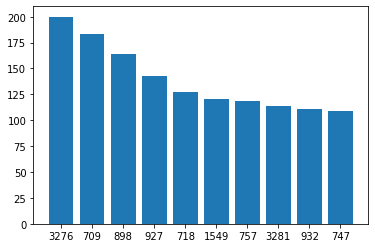

In [48]:
y_pos = np.arange(10)

plt.bar(y_pos, onlyFridaysB2020['Close_dif'].head(10))
plt.xticks(y_pos, onlyFridaysB2020.head(10).index)
plt.show()

---

- How do these results answer your question?
- What are threads to validity?

They will help me see when the largest changes took place.

If there was a holiday on friday where the market was closed, the week difference would be messed up.

---

- The big picture
    - Come back to the original question. What do you conclude from your results?
    - How do your results compare to what is known?
    - Are there any questions that are left unanswered or that are answered with low confidence? How could future studies address them?

They tell me that the largest drop and the largest gain were both in March 2020. Other then that, 2018, 2016 and 2008 were the other notable years.

If there was a holiday on friday where the market was closed, the week difference would be messed up.

The stock market is already heavily researched and analyzed, so I would assume everything is well known.  

The dataset included High/Low it would be interesting to see the volatily per day, and if it would corelate to the above results.  
And there are possibly other metrics that we may need in the future.